In [5]:
import torch
import torchvision
import gudhi as gd
from gudhi.wasserstein import wasserstein_distance

from scipy.io import loadmat
from sklearn.model_selection import train_test_split
import numpy as np
from copy import deepcopy
from tqdm import tqdm
import math
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_edt
%matplotlib inline

from ripser import lower_star_img
from ripser import Rips

import persim
import diagram2vec

import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn import functional as F

import gudhi as gd
from gudhi.wasserstein import wasserstein_distance as dist_w

from IPython.display import clear_output
import pandas as pd
from PIL import Image
import importlib

import utils
import datasets
importlib.reload(utils)
importlib.reload(datasets)
from utils import *
from datasets import *

In [6]:
def show_diagram(path):
    diagrams = torch.load(path)
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    diagram = diagrams[0][0]
    H0 = diagram[diagram[:, 2] == 0]
    H1 = diagram[diagram[:, 2] == 1]
    
    # Plot H0 and H1 points
    axs[0].scatter(H0[:, 0], H0[:, 1], c='r', label='H0')
    axs[0].scatter(H1[:, 0], H1[:, 1], c='b', label='H1')
    axs[0].set_xlim(-0.5, 1)
    axs[0].set_ylim(-0.5, 1)
    axs[0].set_xlabel('Birth')
    axs[0].set_ylabel('Death')
    axs[0].plot([-1, 1], [-1, 1], c='black')
    axs[0].legend()
    
    # Plot histogram of number of points in each diagram
    counts = []
    for b in diagrams:
        counts.append(b[0].shape[0])
    axs[1].hist(counts, bins=20)
    axs[1].set_title('Number of points in each diagram')
    
    # Plot histogram of difference between death and birth
    diffs = []
    for b in diagrams:
        for p in b[0]:
            diffs.append(p[1] - p[0])
    axs[2].hist(diffs, bins=30, log=True)
    axs[2].set_title('Difference between death and birth')
    
    plt.tight_layout()
    plt.show()

## MNIST

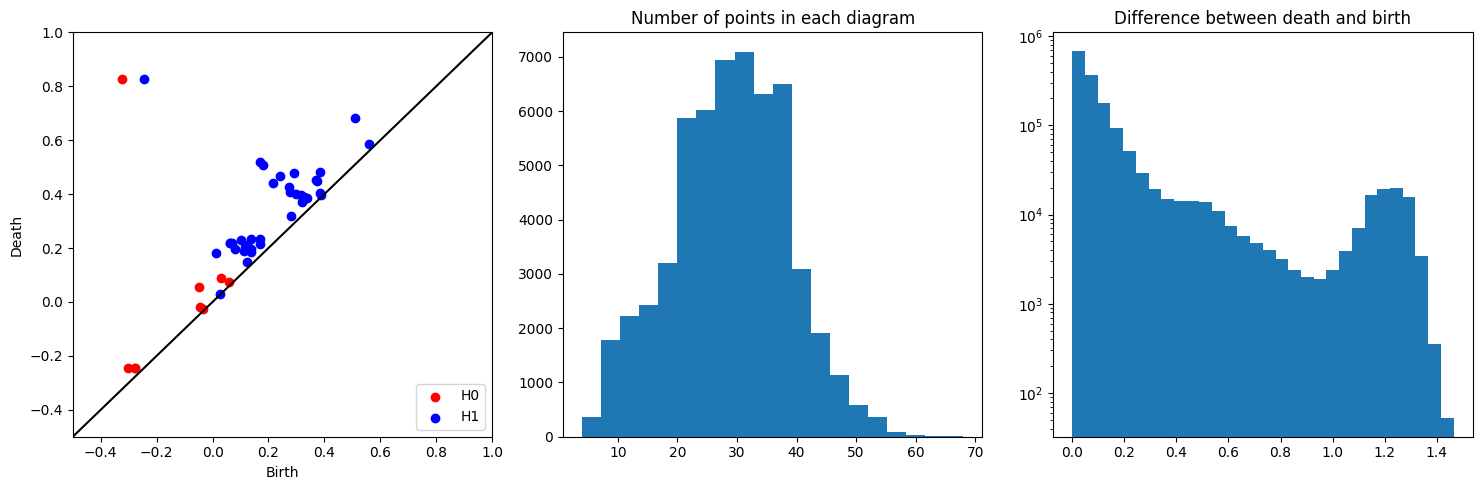

In [93]:
show_diagram('../data/mnist/1_conv_filter_train.pt')

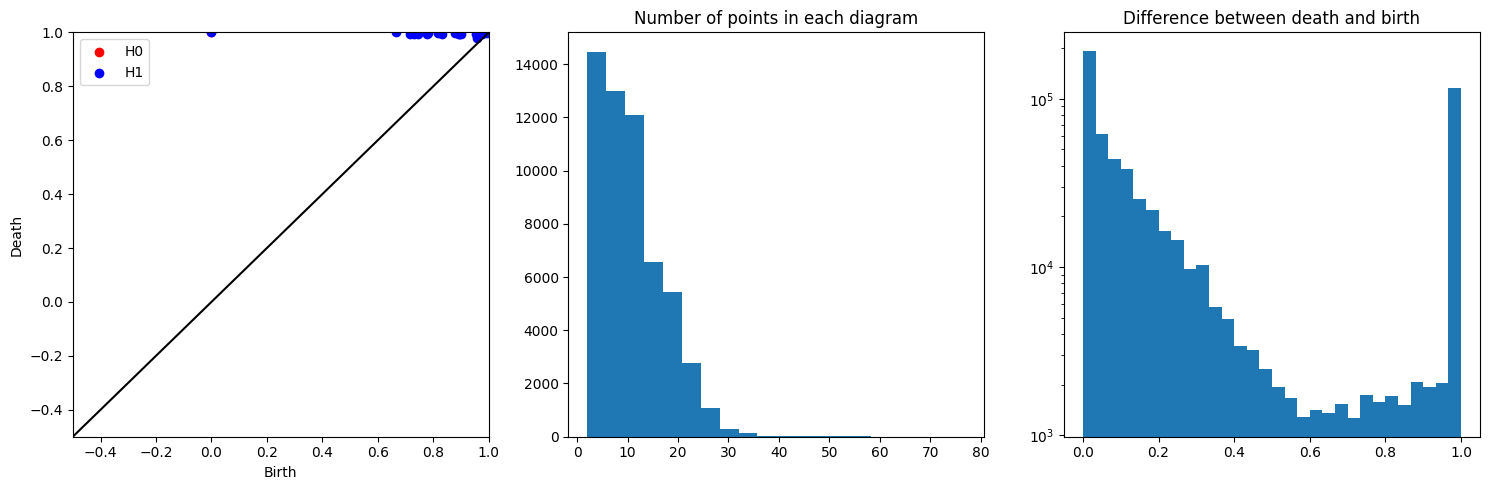

In [94]:
show_diagram('../data/mnist/base_train.pt')

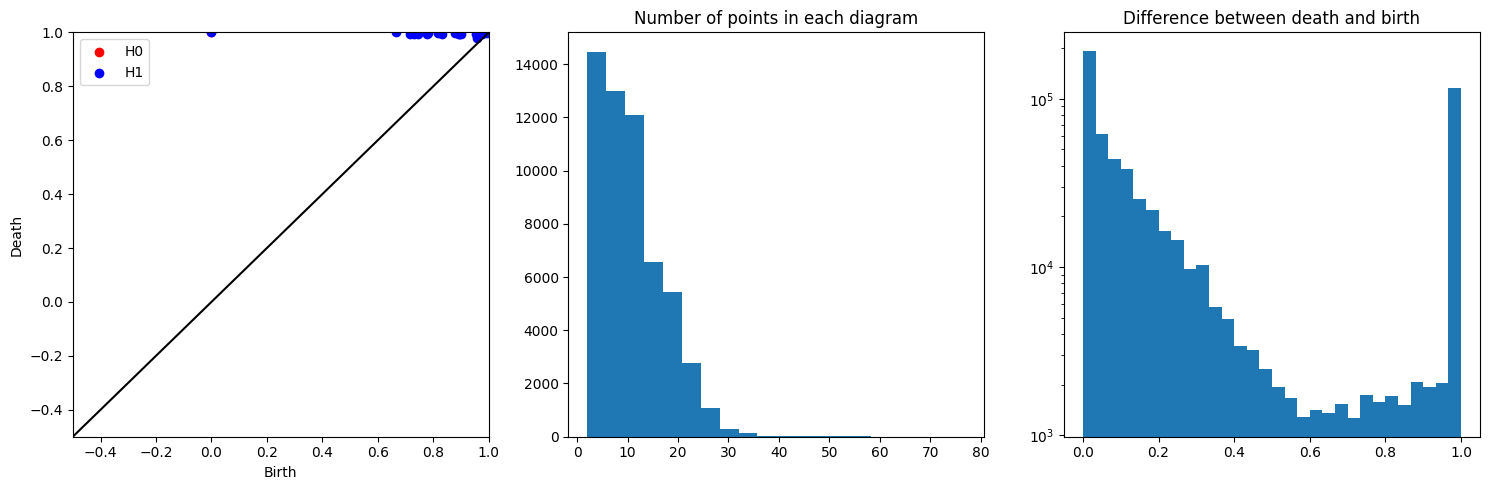

In [95]:
show_diagram('../data/mnist/base_train.pt')

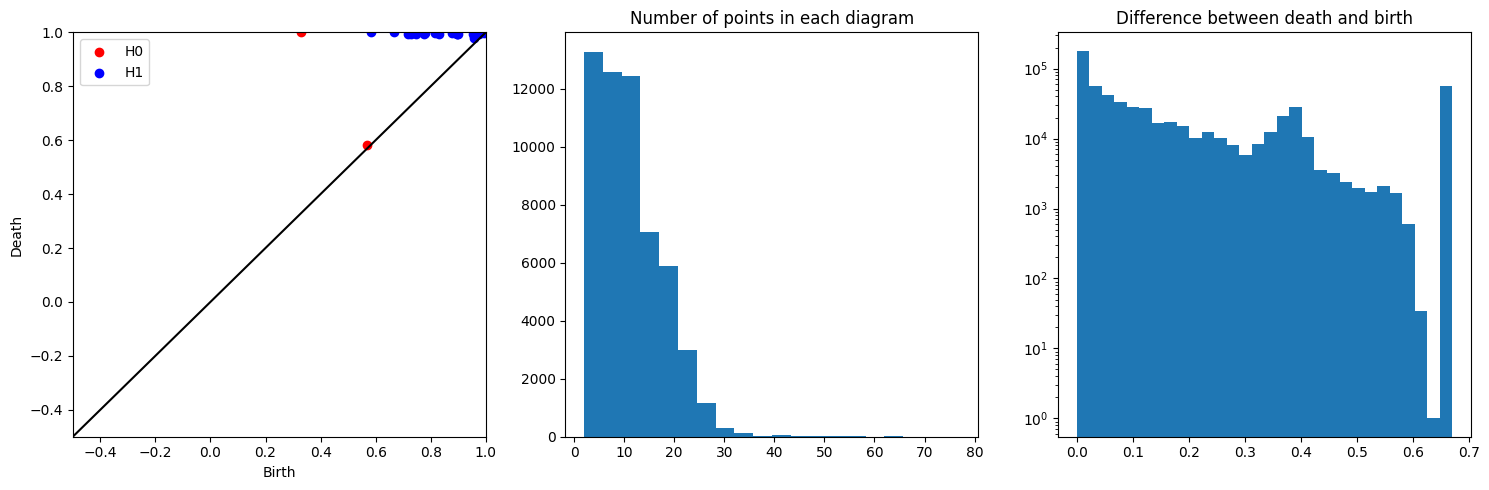

In [96]:
show_diagram('../data/mnist/1_dir_filter_train.pt')

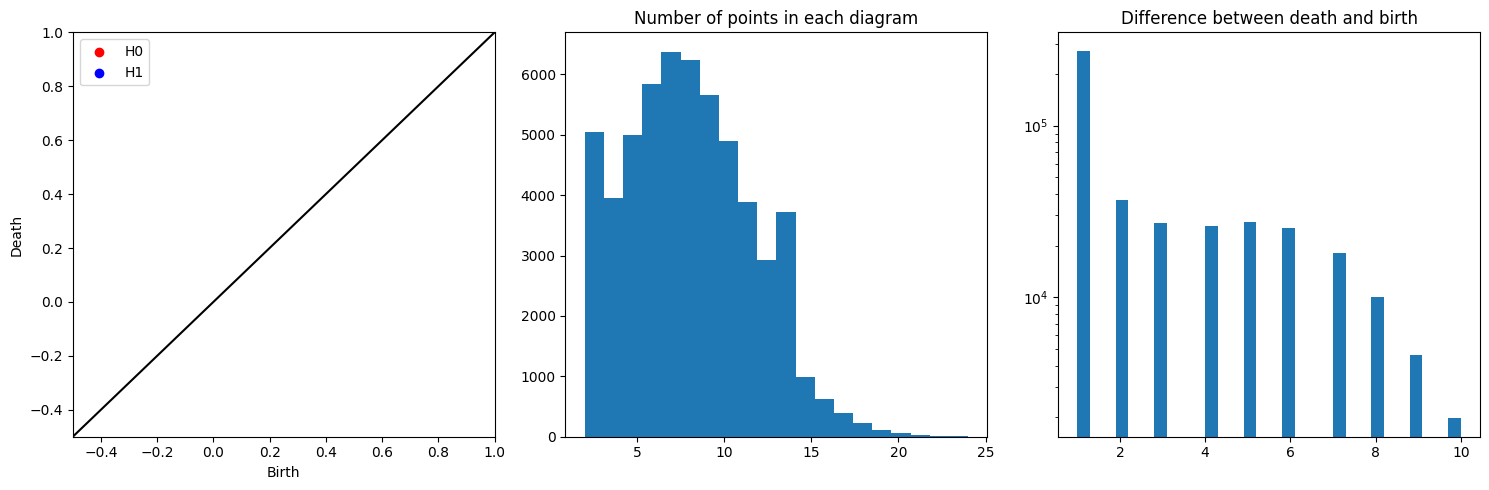

In [97]:
show_diagram('../data/mnist/cedt_filter_train.pt')

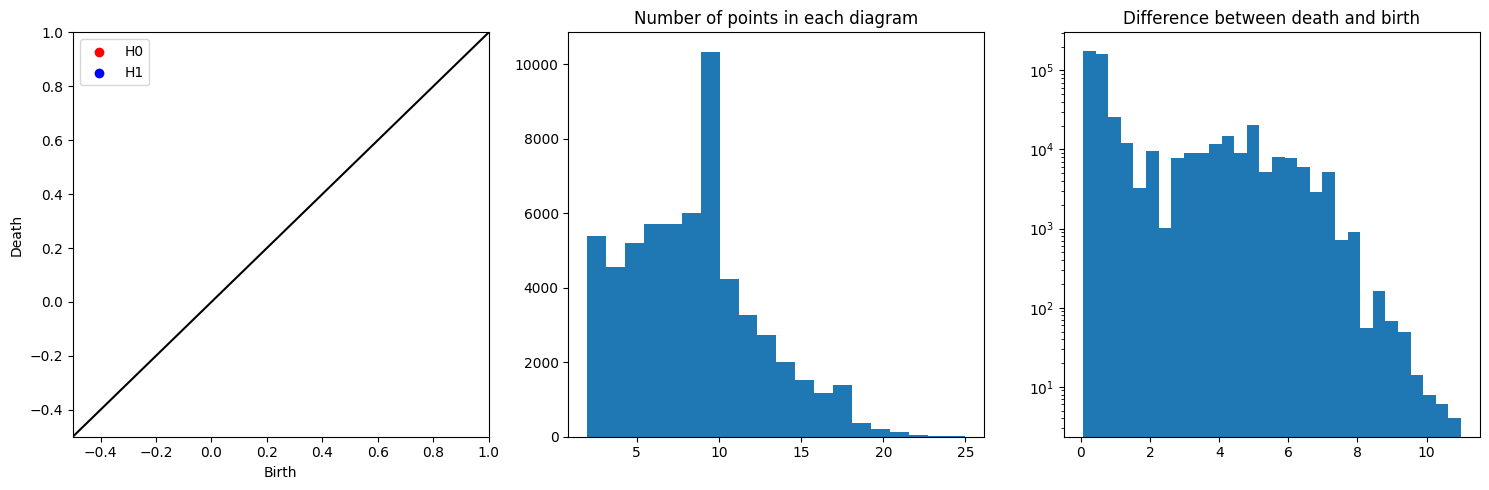

In [9]:
show_diagram('../data/mnist/cedt_filter_train_4_thickening.pt')

## CHINESE-MNIST

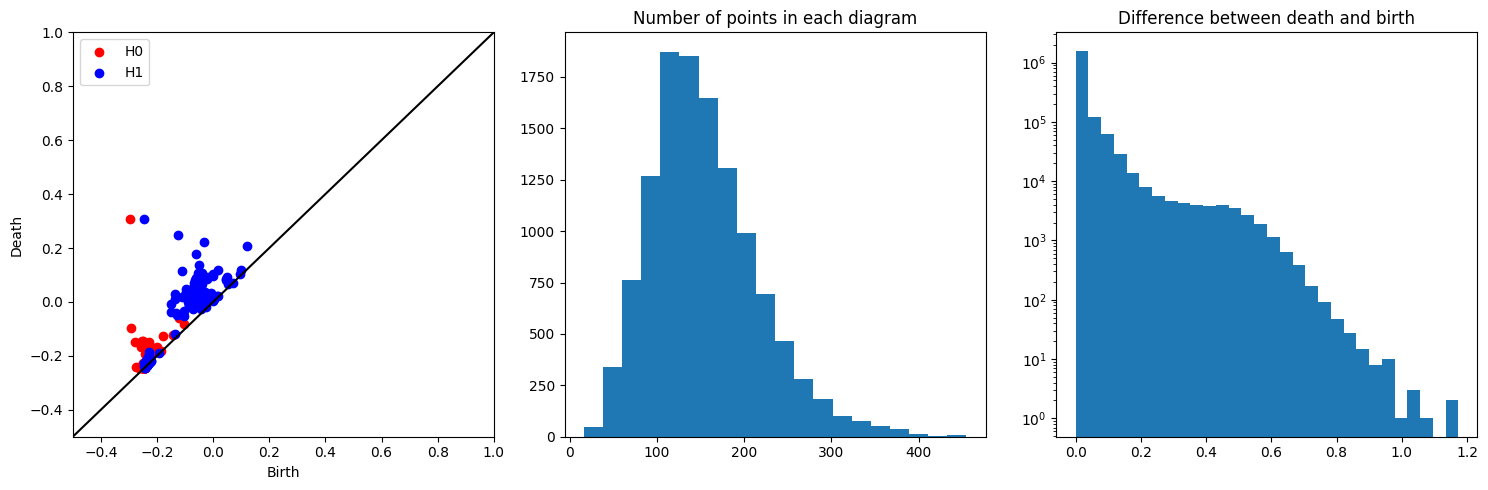

In [98]:
show_diagram('../data/chinese-mnist/1_conv_filter_train.pt')

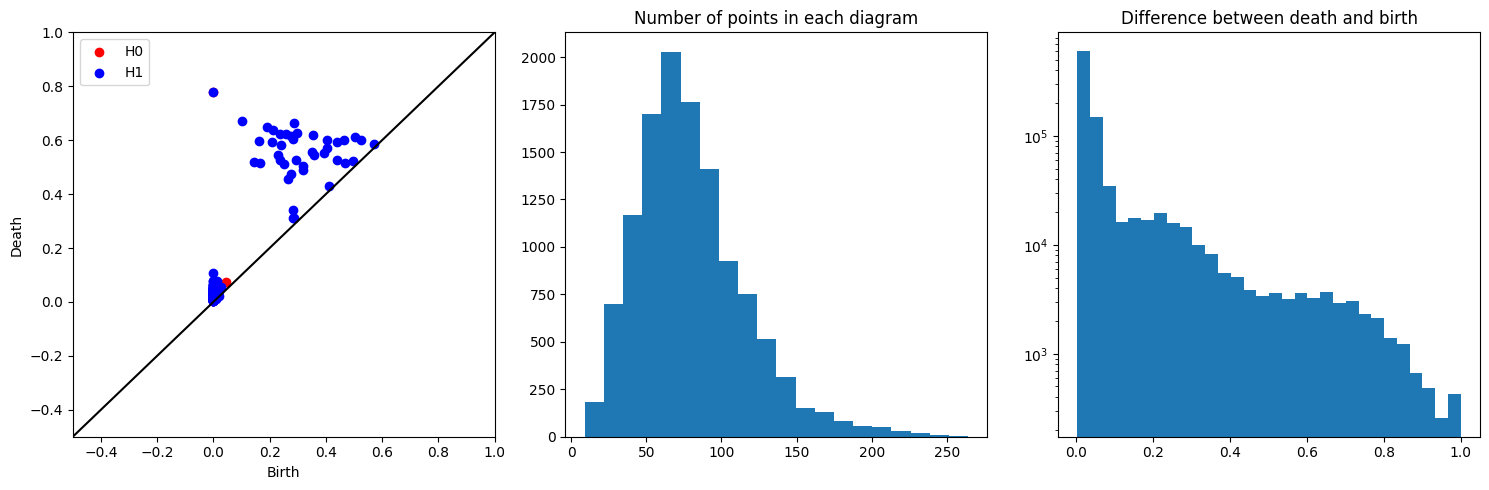

In [99]:
show_diagram('../data/chinese-mnist/base_train.pt')

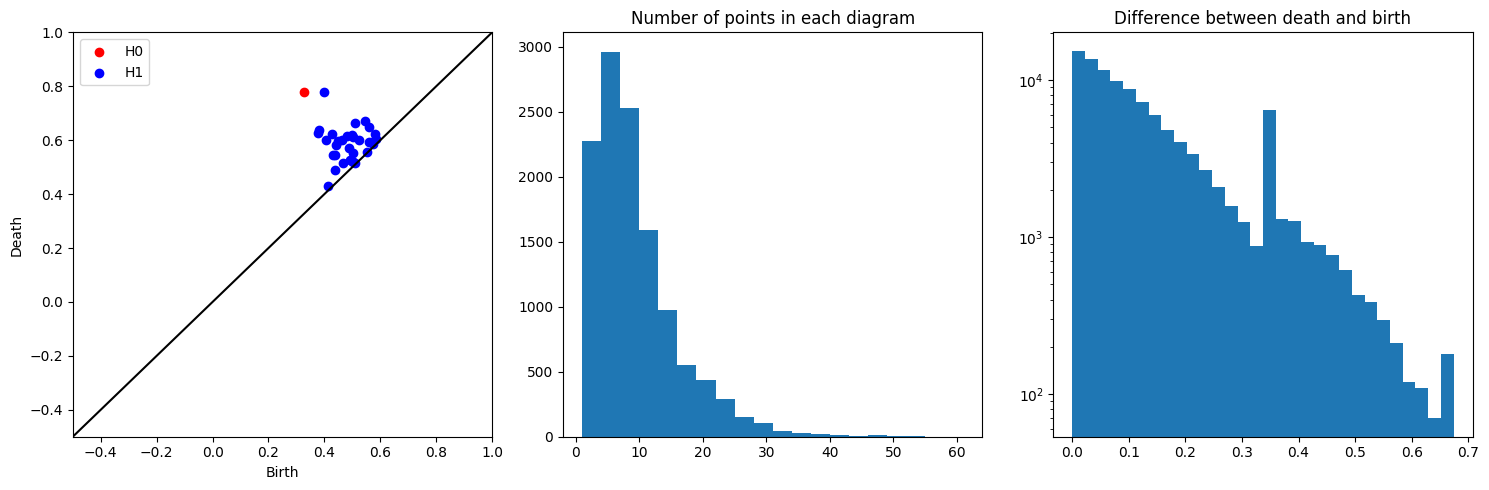

In [100]:
show_diagram('../data/chinese-mnist/1_dir_filter_train.pt')

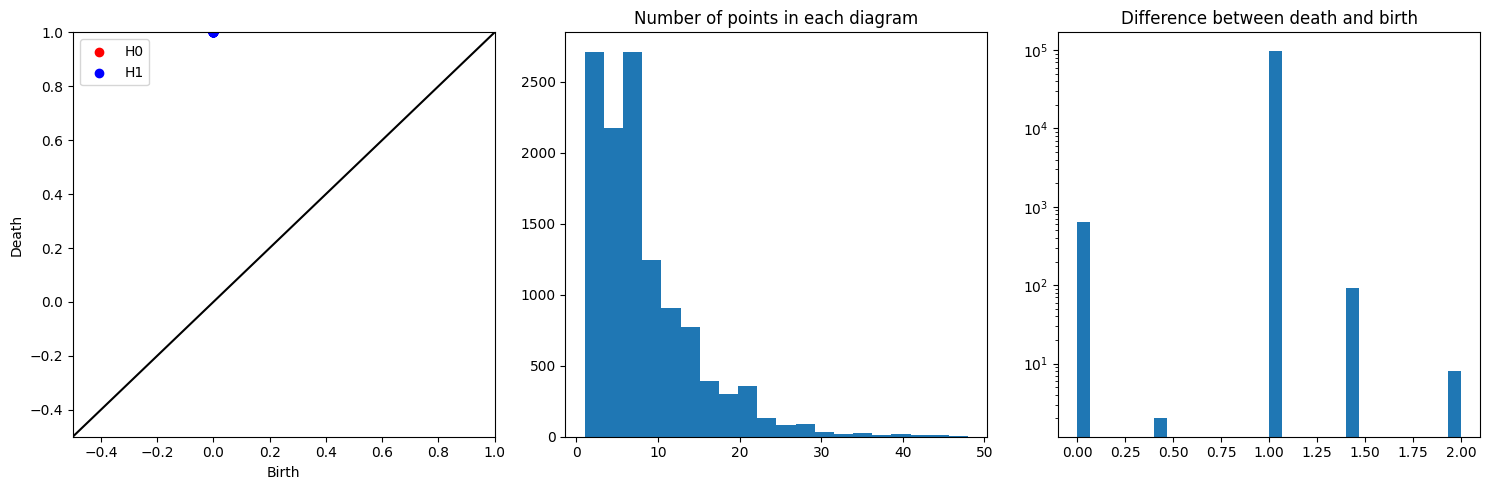

In [101]:
show_diagram('../data/chinese-mnist/cedt_filter_train.pt')